# Zero to Hero

## 1.02  Carga del dataset desde la nube y operaciones básicas

Se muestra una alternativa a cargar el dataset directamente desde la nube, que funciona desde Kaggle, Google Colab
<br>
Si se está corriendo desde la PC local, siempre es preferible cargar el archivo del disco local.

In [1]:
library( "data.table")   #cargo la libreria  data.table

"https://storage.googleapis.com/labo2021/datasetsOri/paquete_premium_202011.csv" está en el repositorio de la asignatura

In [10]:
# dataset <- fread( "https://storage.googleapis.com/labo2021/datasetsOri/paquete_premium_202011.csv")
setwd("C:/Archivos/dmeyf")  #se establece el directorio de trabajo
dataset <- fread("./datasetsOri/paquete_premium_202009.csv")


Obviamente ahora el leer el archivo demora bastante, ya que se está bajando por internet, están viajando 117MB

### Ahora, algunas operaciones básicas con el dataset

cantidad de registros y columnas

In [11]:
nrow( dataset )
ncol( dataset )

[1] 235354

[1] 158

Otra forma de ver la cantidad de registros del dataset, al  *estilo data table*
<br>
El .N  es la cantidad de registros y va en la segunda poscion  dataset[ 1, 2, 3 ]

In [12]:
dataset[ , .N ]

[1] 235354

nombre de las columnas del dataset

Exploración de clase_ternaria.

In [13]:
dataset[ , .N, clase_ternaria]

clase_ternaria,N
<chr>,<int>
CONTINUA,233894
BAJA+2,775
BAJA+1,685


###  varias formas de contar los BAJA+2

todas las formas dan el mismo resultado

In [14]:
nrow(  dataset[ clase_ternaria=="BAJA+2" ])

[1] 775

In [15]:
dataset[ clase_ternaria=="BAJA+2", .N ] #el autentico estilo data.table

[1] 775

In [16]:
dataset[  , sum(clase_ternaria=="BAJA+2")]

[1] 775

### Conteo de proporcion de BAJA+2 en el dataset

In [17]:
dataset[  ,  sum(clase_ternaria=="BAJA+2")/.N]

[1] 0.003292912

Conteo de la proporcion de BAJA+2 en un predicado

In [18]:
dataset[ ctrx_quarter < 20  ,  sum(clase_ternaria=="BAJA+2")/.N]

[1] 0.021205

### Ganancias del dataset

Agregado de la columna ganancia al dataset

Primero le asigno a TODOS los registros el valor de  -1250
<br>
la asignacion se hace con el  :=

In [19]:
dataset[  , ganancia := -1250]

y finalmente a los  BAJA+2 les asigno 48750

In [20]:
dataset[ clase_ternaria=="BAJA+2", ganancia := 48750]

Calculo la ganancia que tendria una campaña en donde envío estímulo a TODOS los clientes

In [21]:
dataset[ , sum(ganancia)]

[1] -255442500

Se **pierden**  249.5 millones de pesos

### Ganancias de predicados univariados

Calculo la ganancia de un predicado simple
ctrx_quarter < 20

In [22]:
dataset[ ctrx_quarter < 20,  sum( ganancia )  ]

[1] -3552500

Ahora  la ganancia de  *ctrx_quarter < 4 *

In [23]:
dataset[ ctrx_quarter < 4,  sum( ganancia )  ]

[1] 420000

Ahora, en forma brutal e ineficiente, busco donde esta el mejor corte de  ctrx_quarter
<br>
Ya resolveremos esto en forma inteligente más adelante

In [24]:
for(  transacciones  in   0:20)
{
   cat(  transacciones, dataset[ ctrx_quarter < transacciones,  sum( ganancia )  ] , "\n")    
}

0 0 
1 686250 
2 896250 
3 523750 
4 420000 
5 172500 
6 110000 
7 -15000 
8 -153750 
9 -227500 
10 -495000 
11 -582500 
12 -787500 
13 -1140000 
14 -1170000 
15 -1178750 
16 -1262500 
17 -1982500 
18 -2305000 
19 -2837500 
20 -3552500 


Observo que el predicado  ctrx_quarter < 9 tiene una ganancia de 4.5 millones de pesos

### Ganancias de predicado complejo

In [25]:
dataset[ ctrx_quarter < 19 & mpasivos_margen < 29.8 ,  sum( ganancia )  ]

[1] 2287500

Enhorabuena ! hemos alcanzado los 7.45 M de ganancia

### gráficos de densidades

Visualización de la densidad de una variable versus clase_ternaria

In [26]:
library("ggplot2") #cargo la libreria ggplot2

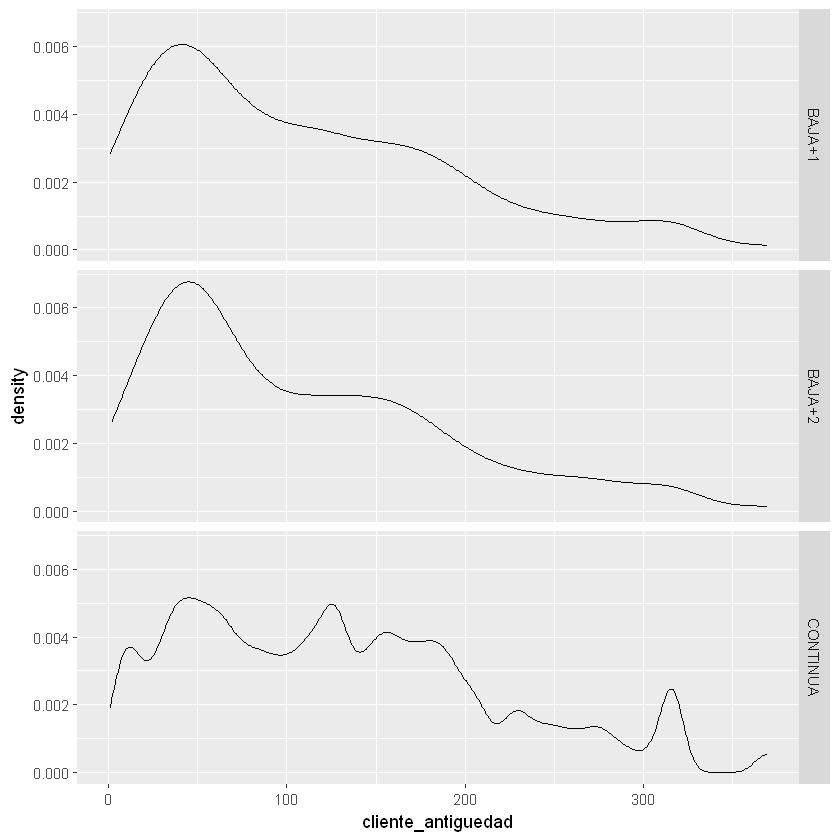

In [27]:
campo <- "cliente_antiguedad" 
ggplot(dataset, aes_string(x = campo)) + geom_density(trim=TRUE, na.rm=TRUE) + facet_grid( "clase_ternaria~ .")

los gráficos salen muy pequeños, busco la documentacion https://blog.revolutionanalytics.com/2015/09/resizing-plots-in-the-r-kernel-for-jupyter-notebooks.html  y agrando los graficos

In [28]:
options(repr.plot.width=15, repr.plot.height=15)

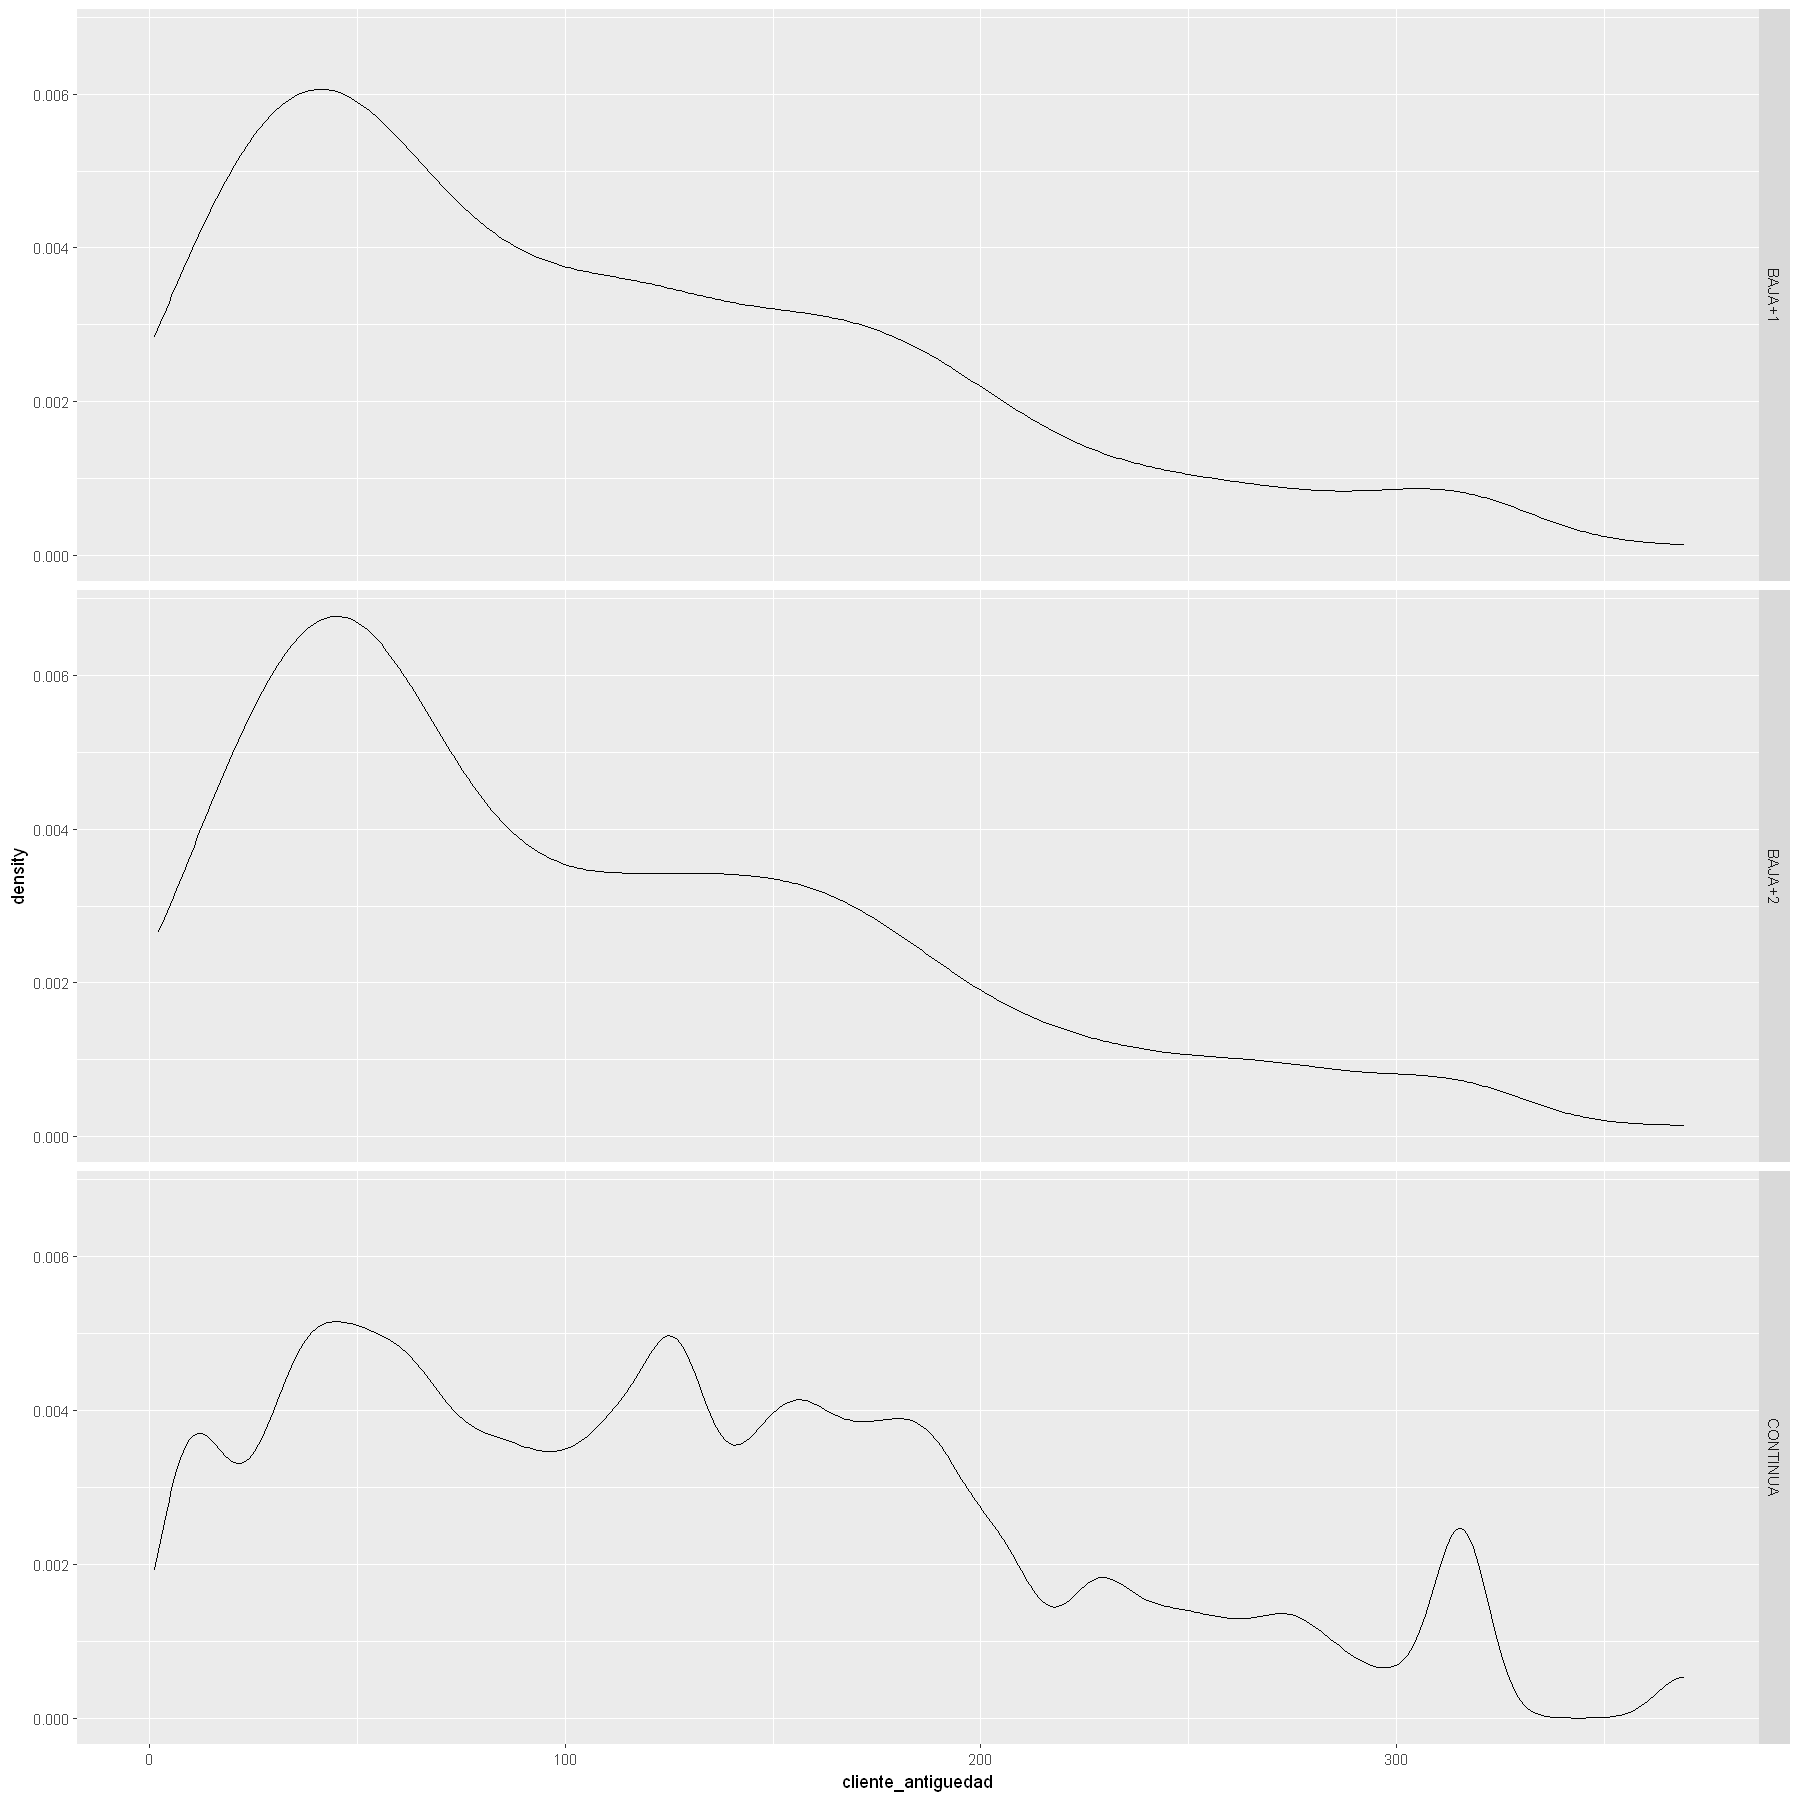

In [29]:
campo <- "cliente_antiguedad" 
ggplot(dataset, aes_string(x = campo)) + geom_density(trim=TRUE, na.rm=TRUE) + facet_grid( "clase_ternaria~ .")